## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)   #görsellerin boyutlari icin
import warnings
warnings.filterwarnings('ignore')

In [54]:
df = pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

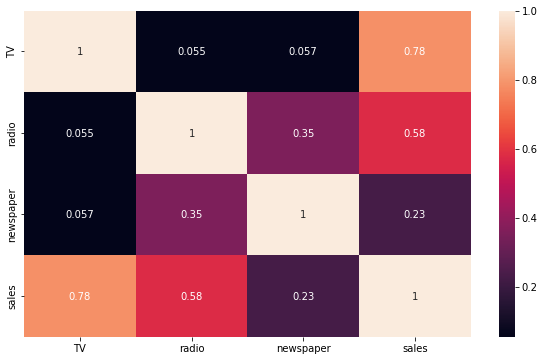

In [6]:
sns.heatmap(df.corr(),annot =True)

In [7]:
#Simple linear da bir bagimli bir bagimsiz 

### Create new independent variable 

In [8]:
df['total_spend'] = df.TV + df.radio + df.newspaper
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [9]:
df = df.iloc[:, [0,1,2,4,3]]   #burda sütunlari siralamak icin
df.head() 

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9


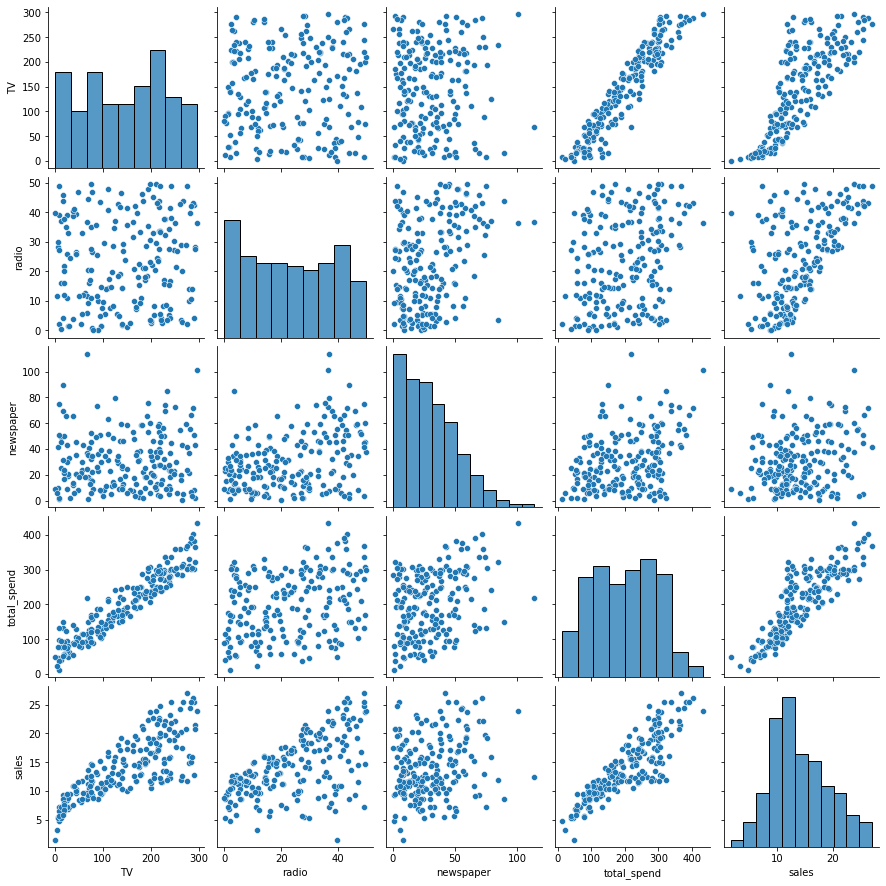

In [10]:
sns.pairplot(df);

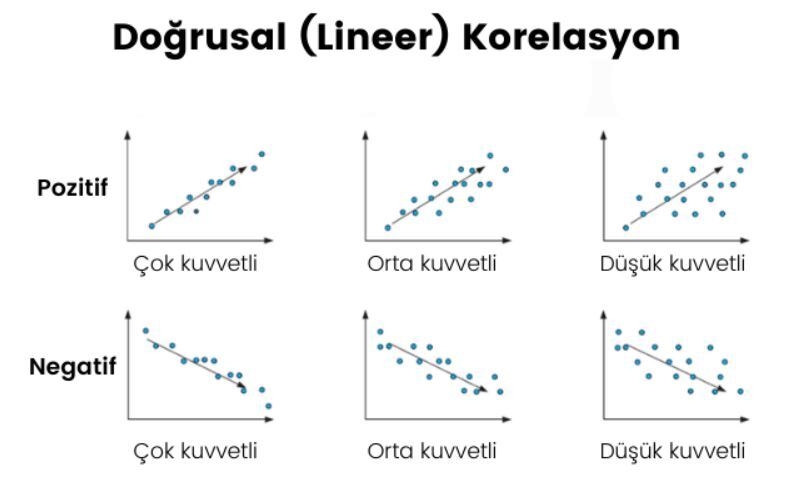

In [11]:
for i in df.drop(columns = "sales"):
    print(f"corr between sales and {i:<12}: {df.sales.corr(df[i])}")
    #i de columns lari yazdiriyor
    #i=12 esittirler altalta gelsin diye

corr between sales and TV          : 0.7822244248616064
corr between sales and radio       : 0.5762225745710553
corr between sales and newspaper   : 0.22829902637616528
corr between sales and total_spend : 0.8677123027017422


In [12]:
df = df[['total_spend','sales']]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


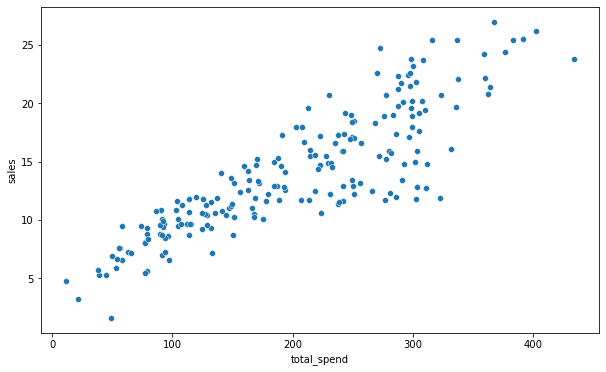

In [13]:
sns.scatterplot(x = 'total_spend', y = 'sales', data=df);

### Correlation between independent variable and dependent variable

In [14]:
corr = df.sales.corr(df.total_spend)
corr

0.8677123027017422

### Coefficent of determination (R2)

In [15]:
R2_score = corr**2    #bagimsiz degisken ,bagimli degiskenindeki degisiminin %75 i acikliyor
R2_score

0.7529246402599598

### R2 score = 3000 /(60.000-50.000)

### R2 score = 0.3

In [ ]:
sns.regplot(x = 'total_spend', y= 'sales', data = df, ci =None)

# linear Regression

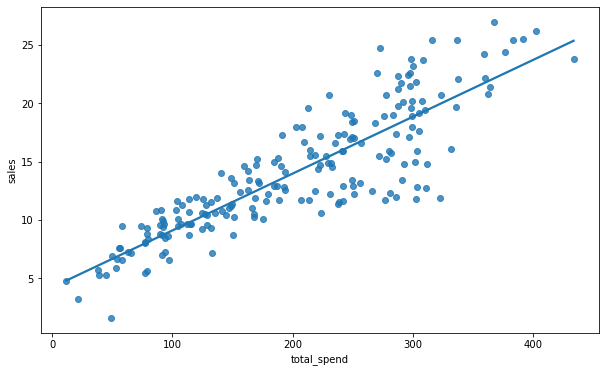

In [16]:
sns.regplot(x = "total_spend", y = "sales", data = df, ci = None);

# Spliting the dataset into X (independent variables) and y (dependent variables)

Independent variables = X \
Dependent variables   = y  \
y = b1 * X + b0     \
y = bağımlı değişken = target variable = dependent variable   \
b1 = katsayı/eğim, slope 0 < b1 < 1 and -1 < b1 < 0 b1=xin katsayisi   \
X = bağımsız değişken /feature, independent variable   \
b0 = otonom parametre / intercept /başlangıç parametresi -∞ < 0 < +∞

In [21]:
X = df["total_spend"]
y = df["sales"]


np.polyfit(X, y, deg =1)         #burda aslinda tahmin yapiyor,katsayilari buluyor,sayilara bakarak
#deg ,simple linearda 1 yaziliyor
#deg = 1, polinomun derecesini (yani 1. derece bir polinom oldugunu) gösteriyor. Kisaca lineer fit.

#bagimli ve bagimsiz degiskenlerin katsayisini veriyor

#xin katsayisi  ve intercepti getiriyor

array([0.04868788, 4.24302822])

## Determination of coofficients (slopes, intercept)

In [45]:
slope, intercept = np.polyfit(X, y, deg =1)  #model olmadan ordaki dogrunun katsayilari icin
print("slope  b1   :", slope)
print("intercept b0 :", intercept)

#yukarida da aynisi varsns.regplot(x)

slope  b1   : 0.04868787931904818
intercept b0 : 4.243028216036325


In [46]:
b1, b0 = np.polyfit(X, y, deg=1)
y_pred = b1 * X + b0
values = {"actual": y, "predicted":y_pred, "resudial": y - y_pred, "LSE" : (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,resudial,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [37]:
df_2.resudial.sum().round(3)

-0.0

In [38]:
df_2.LSE.sum()

1338.4439761715594

### Prediction with simple linear regression

In [39]:
potential_spend = np.linspace(0, 500, 100) # potansiyel harcama
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [40]:
predicted_sales_lin = b1 * potential_spend + b0
predicted_sales_lin

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

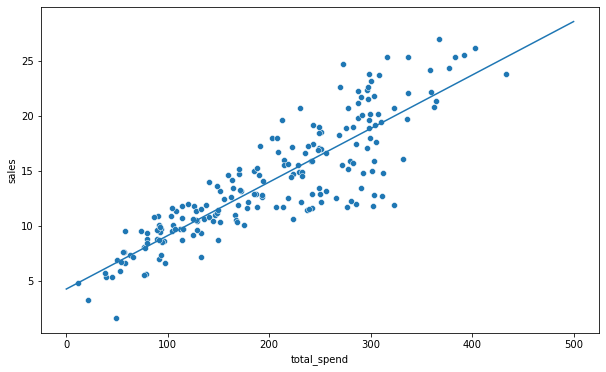

In [44]:
plt.plot(potential_spend, predicted_sales_lin);  #düz dogru icin
sns.scatterplot(x = "total_spend", y = "sales", data = df );

# Multilinear Regression 

In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats      #istatistikte yardimci olan
plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

In [50]:
!pip install missingno
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

In [ ]:
msno.matrix(df);

In [51]:
df.sort_values(by="sales", ascending = False)

,total_spend,sales
175,367.6,27.0
183,402.4,26.2
198,391.8,25.5
98,383.2,25.4
147,336.5,25.4
...,...,...
108,39.1,5.3
78,44.7,5.3
8,11.7,4.8
155,21.4,3.2


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [59]:
print(np.mean([100, 110, 120, 115]))
print(np.std([100, 110, 120, 115]))

111.25
7.39509972887452


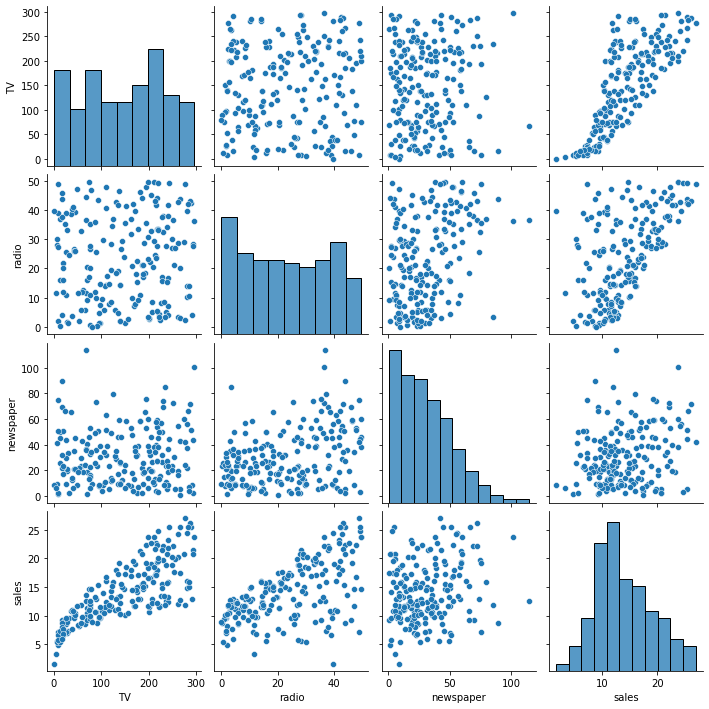

In [60]:
sns.pairplot(df)

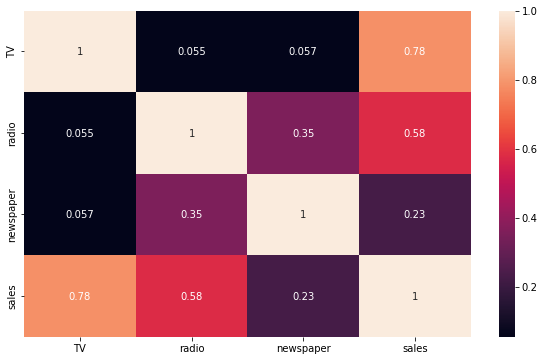

In [62]:
sns.heatmap(df.corr(), annot=True);

In [63]:
from scipy.stats import skew

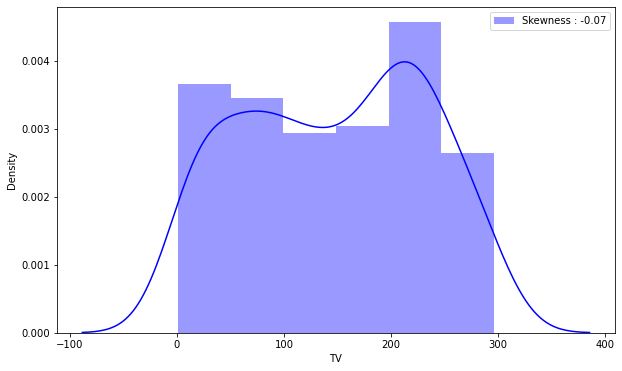

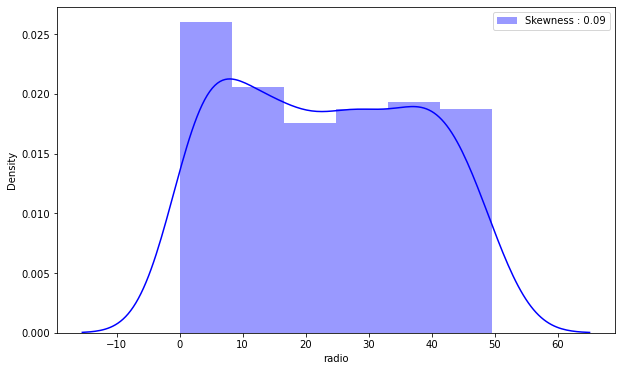

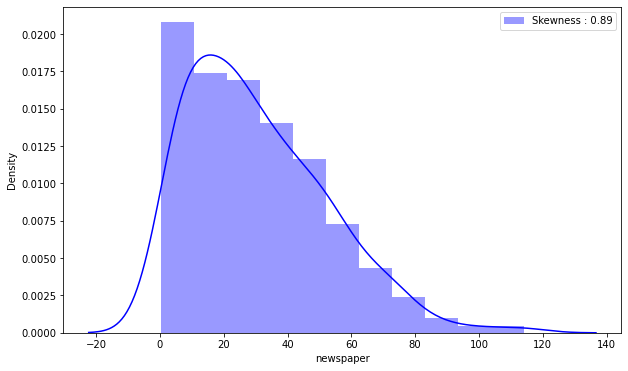

In [64]:
for j in df.drop(columns = "sales").columns:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()
    
    
    #skewwness 0 a yakin olmasi iyi
    
    #right skew +1e doğru left skew -1e doğru

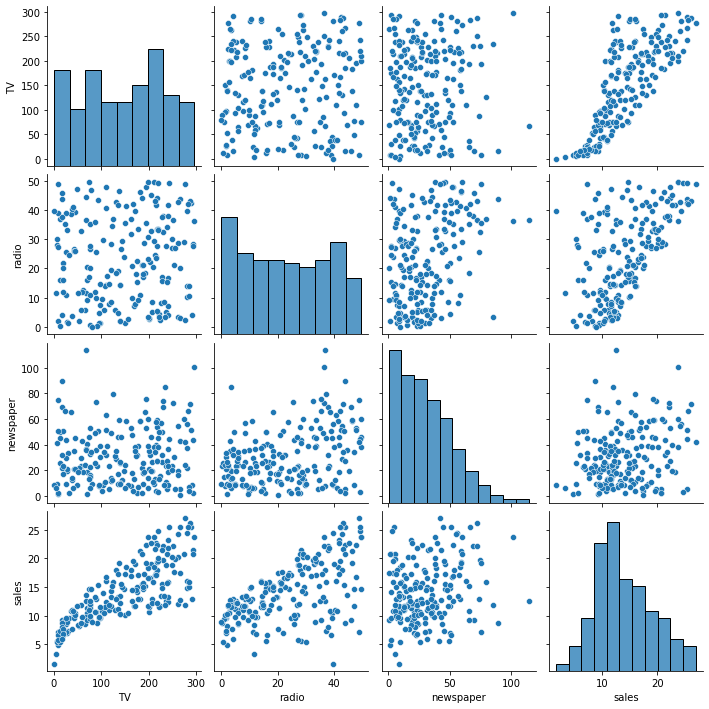

In [66]:
sns.pairplot(df);
#newspaperinki de saga carpik

In [67]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


1000 e kadar % 20/30 test % 80/70 train  \
1000 ile 100000 satır arasında %10/20 test %90/80 train  \
100000 ile 100000000 satır arasında %5 test %95 train   \
100000000 üzeri satırlık datada %1 test % 99 train   \

In [69]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=3c8e234ec428ba473259fa63400c7bf0e844a323a256b197cac280a600e334f4
  Stored in directory: /Users/veyselaytekin/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [70]:
X = df.drop(columns = "sales")
y = df["sales"]

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [75]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
Y Test features shape : (60,)
